In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler,StandardScaler,OneHotEncoder
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

In [2]:
# load the df
df = pd.read_csv('../../data/df_dummies.csv')

In [3]:
# train_test_split
features = df.drop(columns=['heart_attack_risk','income'])
target = df['heart_attack_risk']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state=0)

In [4]:
# normalization
normalizer = MinMaxScaler()
normalizer.fit(X_train)
X_train_norm = normalizer.transform(X_train)
X_test_norm = normalizer.transform(X_test)

X_train_norm = pd.DataFrame(X_train_norm,columns=X_train.columns)
X_test_norm = pd.DataFrame(X_test_norm,columns=X_test.columns)

In [5]:
from imblearn.over_sampling import SMOTE

In [6]:
sm = SMOTE(random_state=123,sampling_strategy=1.0)
X_train_SMOTE, y_train_SMOTE = sm.fit_resample(X_train_norm,y_train)

In [7]:
y_train_SMOTE.value_counts()

heart_attack_risk
0    4510
1    4510
Name: count, dtype: int64

# Adaptive Boosting

In [8]:
ada_reg = AdaBoostClassifier(DecisionTreeClassifier(max_depth=20),
                            n_estimators=100)

ada_reg.fit(X_train_SMOTE, y_train_SMOTE)

c:\Users\54189\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=20),
                   n_estimators=100)

In [9]:
pred_ada = ada_reg.predict(X_test_norm)

In [10]:
print(classification_report(y_test, pred_ada))

              precision    recall  f1-score   support

           0       0.63      0.82      0.72      1114
           1       0.36      0.17      0.23       639

    accuracy                           0.59      1753
   macro avg       0.50      0.50      0.48      1753
weighted avg       0.54      0.59      0.54      1753



In [11]:
confusion_matrix(y_test,pred_ada)

array([[918, 196],
       [528, 111]], dtype=int64)

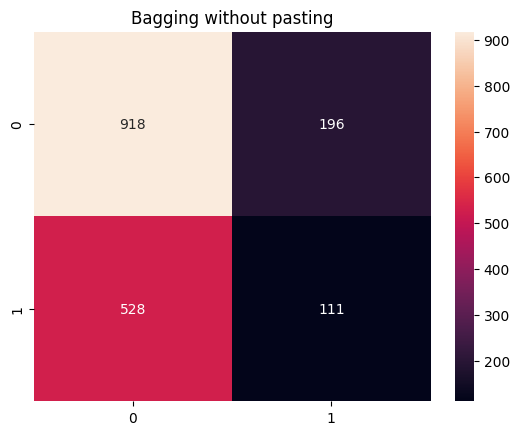

In [12]:
sns.heatmap(confusion_matrix(y_test, pred_ada), annot=True,fmt='g')
plt.title('Bagging without pasting')
plt.show()

In [13]:
import plotly.express as px

In [17]:
cm = pd.DataFrame(confusion_matrix(y_test, pred_ada))
# Rename columns to predicted values - 0 = No Risk, 1 = Risk
cm.rename({0: 'No - True', 1: 'Yes - True'}, axis=1, inplace=True)
# Rename rows to real values - 0 = No Risk, 1 = Risk
cm.rename({0: 'No - Pred', 1: 'Yes - Pred'}, axis=0, inplace=True)
fig = px.imshow(cm, text_auto=True, color_continuous_scale='RdBu', color_continuous_midpoint=0)
fig